In [2]:
# Cell 1: Install required libraries
!pip install yfinance pandas numpy matplotlib seaborn statsmodels


In [3]:
# Cell 2: Import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

plt.style.use('seaborn-v0_8-darkgrid')  # fallback if seaborn-darkgrid fails


⚙️ Cell 3: Config and Download Data

In [4]:
# Cell 3: Config and download data
tickers = ['TSLA', 'BND', 'SPY']
start = '2015-07-01'
end = '2025-07-31'

all_data = {}

for ticker in tickers:
    print(f"Downloading {ticker}...")
    df = yf.download(ticker, start=start, end=end, auto_adjust=False)
    df.ffill(inplace=True)  # Fill missing data
    df['Ticker'] = ticker
    all_data[ticker] = df


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


🔄 Cell 4: Combine All Ticker Data

In [5]:
# Cell 4: Combine into a single DataFrame
combined_df = pd.concat(all_data.values(), axis=0)
combined_df.index.name = 'Date'
combined_df.head()


Price,Adj Close,Close,High,Low,Open,Volume,Ticker,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,BND,BND,BND,BND,BND,BND,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,,,,,,,,,,,,,,
2015-07-01,17.943333,17.943333,18.174667,17.856667,18.073999,31518000.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-02,18.667999,18.667999,18.830000,18.220667,18.680000,107458500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-06,18.648001,18.648001,18.779333,18.420000,18.591999,61828500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-07,17.858667,17.858667,18.346666,17.384666,18.333332,91576500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-08,16.997334,16.997334,17.386667,16.954000,17.288000,93316500.0,TSLA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


🔍 Cell 5: Analyze and Visualize Each Ticker


--- TSLA ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  2535 non-null   float64
 1   (Close, TSLA)      2535 non-null   float64
 2   (High, TSLA)       2535 non-null   float64
 3   (Low, TSLA)        2535 non-null   float64
 4   (Open, TSLA)       2535 non-null   float64
 5   (Volume, TSLA)     2535 non-null   int64  
 6   (Ticker, )         2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     131.963002   131.963002   134.960429   128.837831   132.000600   
std      120.914904   120.914904   123.783736   117.996631   

<Figure size 1000x400 with 0 Axes>

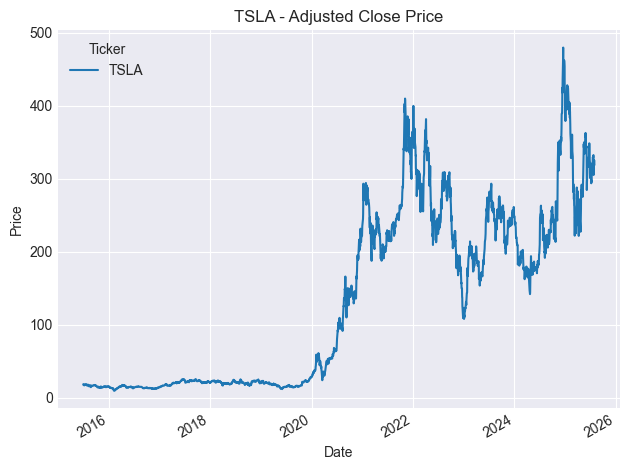

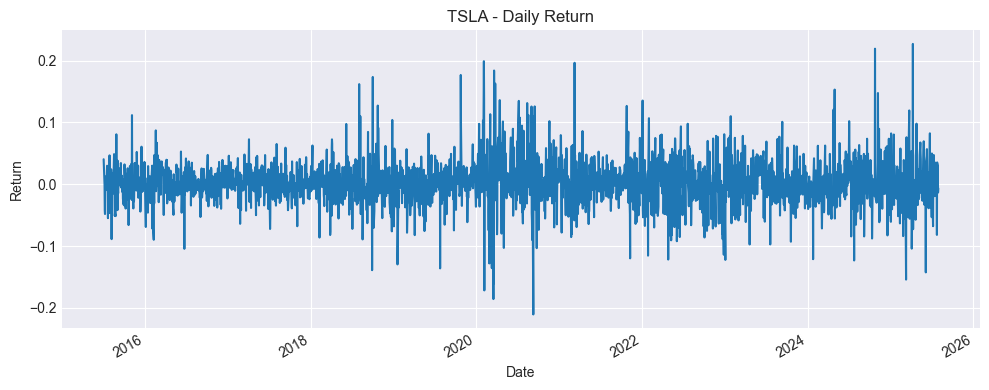

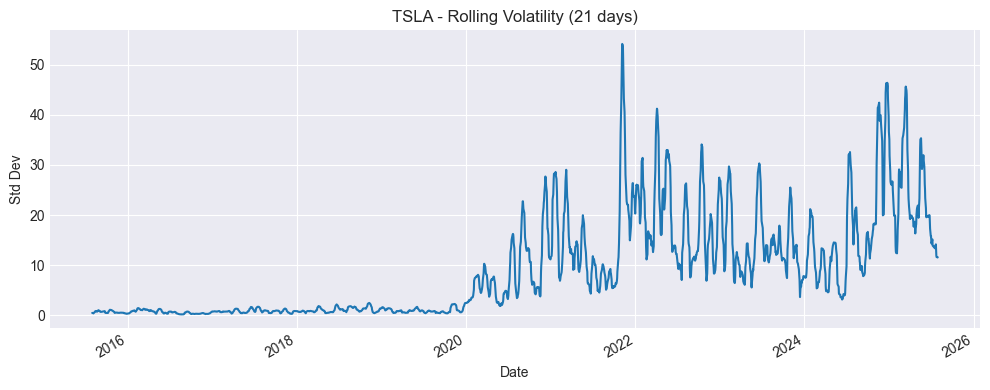


Risk Metrics for TSLA:
95% Value at Risk (VaR): -0.0547
Sharpe Ratio: 0.7783

--- BND ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, BND)  2535 non-null   float64
 1   (Close, BND)      2535 non-null   float64
 2   (High, BND)       2535 non-null   float64
 3   (Low, BND)        2535 non-null   float64
 4   (Open, BND)       2535 non-null   float64
 5   (Volume, BND)     2535 non-null   int64  
 6   (Ticker, )        2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker          BND          BND          BND          BND          BND   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean      68.469189    79.644994    79.761641    79.525704    79.647

<Figure size 1000x400 with 0 Axes>

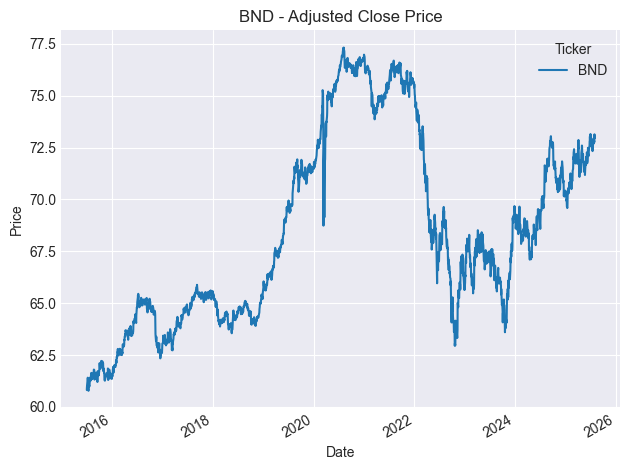

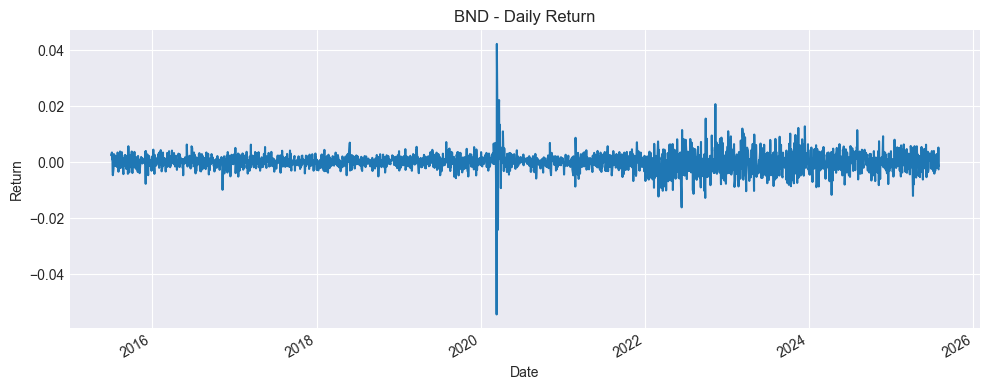

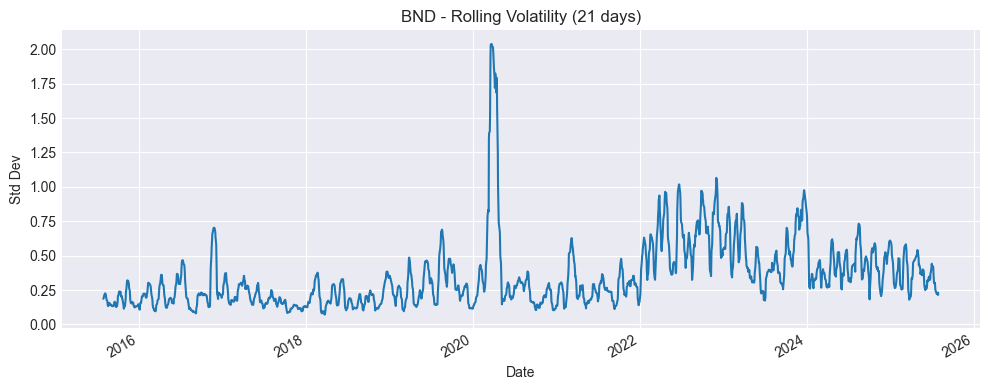


Risk Metrics for BND:
95% Value at Risk (VaR): -0.0049
Sharpe Ratio: 0.3569

--- SPY ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, SPY)  2535 non-null   float64
 1   (Close, SPY)      2535 non-null   float64
 2   (High, SPY)       2535 non-null   float64
 3   (Low, SPY)        2535 non-null   float64
 4   (Open, SPY)       2535 non-null   float64
 5   (Volume, SPY)     2535 non-null   int64  
 6   (Ticker, )        2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker          SPY          SPY          SPY          SPY          SPY   
count   2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     334.193732   355.426505   357.322560   353.221996   355.3551

<Figure size 1000x400 with 0 Axes>

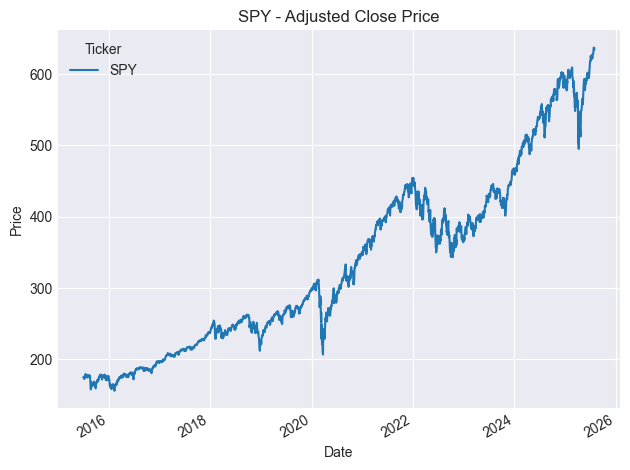

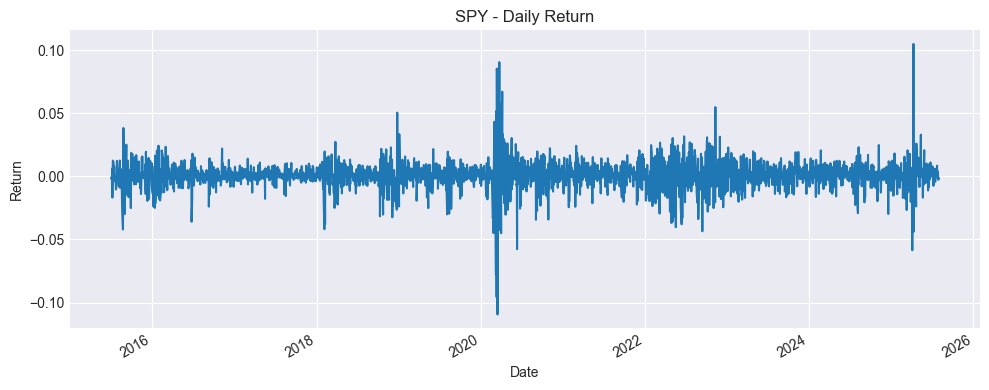

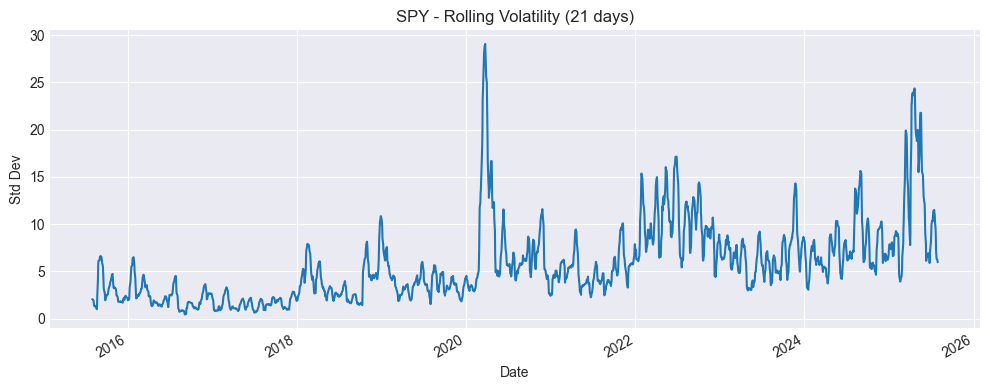


Risk Metrics for SPY:
95% Value at Risk (VaR): -0.0172
Sharpe Ratio: 0.7941


In [6]:
# Cell 5: Analysis and Visualization per Ticker
for ticker in tickers:
    print(f"\n--- {ticker} ---")
    df = all_data[ticker].copy()

    print(df.info())
    print(df.describe())
    print("Missing values:\n", df.isnull().sum())

    # Daily Return
    df['Daily Return'] = df['Adj Close'].pct_change()

    # Rolling volatility
    df['Rolling Mean'] = df['Adj Close'].rolling(window=21).mean()
    df['Rolling Std'] = df['Adj Close'].rolling(window=21).std()

    # ADF Test
    print(f"\nADF Test for {ticker} Adj Close:")
    result = adfuller(df['Adj Close'].dropna())
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-stationary")

    # -------------------- Plots --------------------
    plt.figure(figsize=(10, 4))
    df['Adj Close'].plot(title=f"{ticker} - Adjusted Close Price")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    df['Daily Return'].plot(title=f"{ticker} - Daily Return")
    plt.xlabel("Date")
    plt.ylabel("Return")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 4))
    df['Rolling Std'].plot(title=f"{ticker} - Rolling Volatility (21 days)")
    plt.xlabel("Date")
    plt.ylabel("Std Dev")
    plt.tight_layout()
    plt.show()

    # -------------------- Risk Metrics --------------------
    print(f"\nRisk Metrics for {ticker}:")
    var_95 = np.percentile(df['Daily Return'].dropna(), 5)
    sharpe = (df['Daily Return'].mean() / df['Daily Return'].std()) * np.sqrt(252)
    print(f"95% Value at Risk (VaR): {var_95:.4f}")
    print(f"Sharpe Ratio: {sharpe:.4f}")
